In [ ]:
"Module on garbage collector, hash, system hashing, types annotation, systen coding."

In [3]:
import dis
import hashlib
import socket
import ssl
from typing import Dict, List

from cryptography.fernet import Fernet
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding, rsa

# !pip install cryptography

# Garbage Collector training

In [1]:
list1 = [
    2
]  # структура даннных (содержит данные или др списки). структура даннных - контейнер,кот хранит все данные
list2 = list1
id(list1) == id(list2)
list1 is list2
del list1
# id(list2)
# id(list1)
print(list2)
del list2
id(list2)

[2]


NameError: name 'list2' is not defined

Интерпретатор - программа, которая построчно читает код сверху вниз. 
Компилятор - это программа, которая собирает весь файл программы. Программа скомпилируется, только если нет ошибок. Компилятор делает работу единоразово.

In [1]:
# Late binding. See picture below
powers = []  #
for i in (1, 2):  # loop over the tuple (1,2)

    def inner(var_x):  # i == 1. Entering the def.
        return var_x**i  # no x added at the point.

    powers.append(
        inner
    )  # calling the function and putting it into powers as 1st\2nd element
for (
    var_p
) in (
    powers
):  # call for each element in powers(2 inner functions), and feed 5 into each of the functions.Return result
    print(var_p(5))  #

25
25


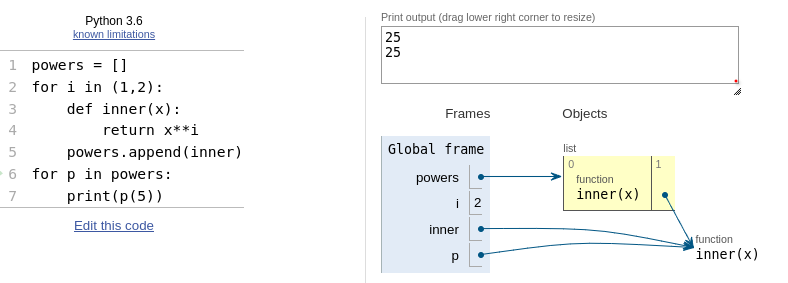

In [4]:
powers = []
for i in (1, 2):

    def inner(var_x):
        return var_x**i

    powers.append(inner)
dis.dis(powers[0])
for var_p in powers:
    print(var_p(5))

  4           0 RESUME                   0

  5           2 LOAD_FAST                0 (var_x)
              4 LOAD_GLOBAL              0 (i)
             16 BINARY_OP                8 (**)
             20 RETURN_VALUE
25
25


In [3]:
def plus_one(x: int) -> int:
    return x + 1


dis.dis(plus_one)

  2           0 RESUME                   0

  3           2 LOAD_FAST                0 (x)
              4 LOAD_CONST               1 (1)
              6 BINARY_OP                0 (+)
             10 RETURN_VALUE


# Хеширование

Хэширование – это процесс превращения данных в уникальную строку фиксированной длины, которую невозможно восстановить в исходные данные. Используется  для работы с шифрованием и безопасностью. В Python, можно использовать встроенную библиотеку hashlib для хэширования данных.

In [4]:
#  Например, создадим MD5-хэш строки:
data = "Hello, Python!"
hash_object = hashlib.md5(data.encode())
md5_hash = hash_object.hexdigest()

print(md5_hash)

a0af7810eb5fcb84c730f851361de06a


## Симметричное шифрование

Симметричное шифрование подразумевает использование одного и того же ключа для шифрования и дешифрования данных. В Python, одной из популярных библиотек для симметричного шифрования является cryptography. Установите ее с помощью pip:

In [5]:
# Генерация ключа
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Шифрование данных
data = b"Hello, Python!"
encrypted_data = cipher_suite.encrypt(data)

# Дешифрование данных
decrypted_data = cipher_suite.decrypt(encrypted_data)

print(encrypted_data)
print(decrypted_data)

b'gAAAAABlTycIM-tAY_z888LmmEMMXGMQ5Z486S56qCMSk2WpKAxa4L8BXhxr-glJiKsLl2RYYVLhyrl2EjVEoCLICIl8f0uGHA=='
b'Hello, Python!'


## Асимметричное шифрование

Асимметричное шифрование использует пару ключей – открытый и закрытый. Открытый ключ используется для шифрования данных, а закрытый – для дешифрования. В Python можно использовать библиотеку cryptography для работы с асимметричным шифрованием. Пример использования RSA-шифрования:

In [6]:
# Генерация пары ключей
private_key = rsa.generate_private_key(
    public_exponent=65537, key_size=2048, backend=default_backend()
)
public_key = private_key.public_key()

# Шифрование данных
data = b"Hello, Python!"
encrypted_data = public_key.encrypt(
    data,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None,
    ),
)

# Дешифрование данных
decrypted_data = private_key.decrypt(
    encrypted_data,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None,
    ),
)

print(encrypted_data)
print(decrypted_data)

b'H\x03\xcb\x93\xd7\x92\xc9\xc4\xfb\xd3\x10B\xa7\xb8\x15\xeb*\xd1\x06(\x81\x1c_\xf9R\x02\x9c\xc2n\x89\xbb#\x9dgd8\x8b\t\x83\x8f_2\xb5\x7f\xda\x93\xcf\xe7&\x96\xb4\x1d\xf0\xe2\x8e]\xbe\xcc\xc3\xbfM\x88\x84\xca\xaeX&\x10\xf9\x9f\x0f\xaf/\xc3\xbd\xbd\xb5U\xab\x88E\xe6QRNQ\xbc%\xbb/\xc1\x95&\x9a\xb0\xc6\x035\x0c#\x85\xc0\x16/\xde\xd3<\x85\x86"~]\xcb\x1aVxHy\xdb\xe6\xdd\x8c\x8as\xe7\x88\xca/\xf8G\x9e\x96ZA\xb3/\x1e\x1d2WNR\xb9!{;\x99\xbd\x07A\xfe\xbc\x0b\x8f\x0b\n\xa4+\\6]\x806\xfe\xc7\x1c\xc9\x1cE3\x831e\xab\x01\xbaW\xa2\x0cr\xe3Z\xf9\xe9<\x12\x8e1\xec\xc3\xac%t\xe9\xae\xdf\xcd\x15M\x0b\xd7("x\x96\xd4bV\xc3 "\xa8?\xd0\x1b\x18m\x94\x98\x04\xbd\xb5H\xfb\x9d\xba\x07\x1c\xab=\x8a\xc5\xc2=\xc1\xa2a\xee\xdc\xc6\xbd\xf3.\xc4\x9ee\xf9\x1d\xe8_\xd0\xd0\xd82\x0c\xf1'
b'Hello, Python!'


## SSL и TLS

модуль ssl для работы с SSL и TLS протоколами, который позволяет обеспечить безопасное соединение между клиентом и сервером. 

In [8]:
# Пример создания безопасного соединения с использованием ssl:

hostname = "www.python.org"
context = ssl.create_default_context()

with socket.create_connection((hostname, 443)) as sock:
    with context.wrap_socket(sock, server_hostname=hostname) as ssock:
        print(ssock.version())

TLSv1.3


# Аннотация типов

Аннотации типов не обеспечивают проверку типов на уровне интерпретатора. Они предназначены для использования разработчиками, средами разработки, линтерами, программами проверки типов и т. д.

Python имеет динамическую типизацию, поэтому типы известны только во время выполнения, а не во время компиляции (как это происходит в языках со статической типизацией, таких как C#).
Python поддерживает аннотацию типов для основных типов переменных, поддерживаемых языком: str, int, float, bool и None. Кроме того, в комплект входит модуль typing, позволяющий использовать более специализированные типы.

In [9]:
# Аннотация переменных

# чтобы указать тип переменной в Python, просто добавьте двоеточие с пробелом,
# за которым следует тип (str, int, List[] и т. д.), сразу после имени переменной

name: str = "Tommy"
age: int = 24
height_in_meters: float = 1.7
colleagues: List[str] = ["Alicia", "John"]

In [14]:
# Аннотация функций

# чтобы указать тип возврата (return), мы добавляем стрелку –>, за которой следует его тип.
#


def convert_celcius_to_fahrenheit(celcius_temp: float) -> float:
    return (celcius_temp * 9 / 5) + 32


def send_email(
    subject: str, body: str, recipients: List[str], cache: Dict[str, str]
) -> bool:
    # пропущено для краткости
    return True  # или False